In [791]:
#imporitng the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [792]:
#Read the csv file using pandas
byke= pd.read_csv(r"C:\Users\Dell\Downloads\day (1).csv")

In [793]:
#Inspect first few rows
byke.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [794]:
#check dataframe for null and datatype 
byke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [795]:
byke.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [796]:
#Renaim the columns
byke.rename(columns={'yr':'year','mnth':'month','hum':'humidity'},inplace=True)

In [797]:
#check the shape
byke.shape

(730, 16)

In [798]:
#Drop duplicates if any
byke.drop_duplicates(inplace=True)

In [799]:
#check the shape
byke.shape

(730, 16)

In [800]:
# Droping column which has nothing to do with target
byke.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [801]:
byke.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


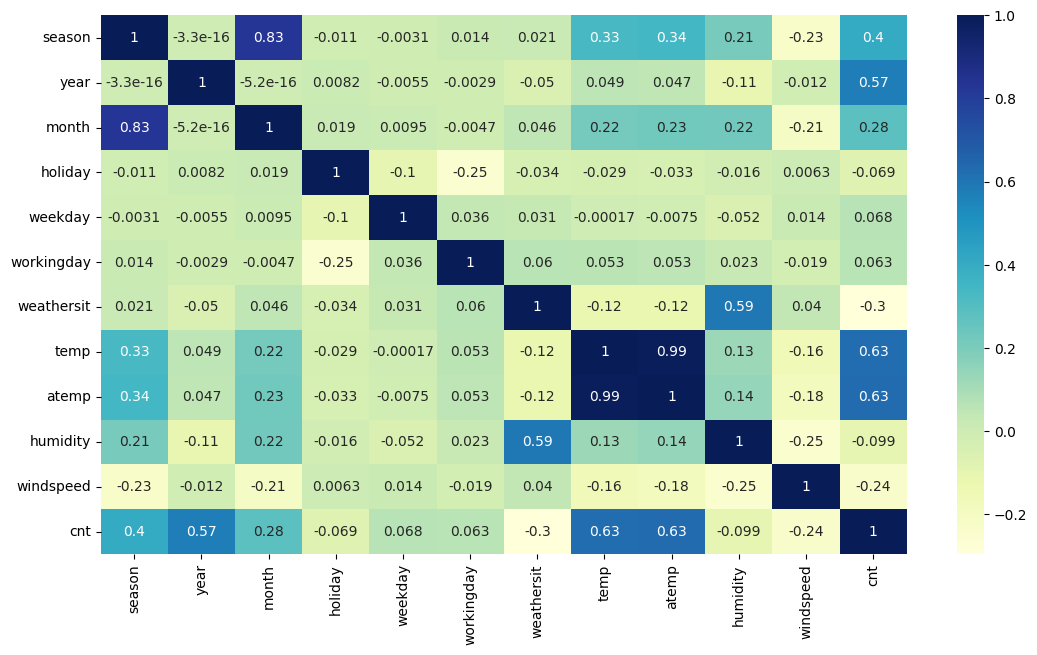

In [802]:
#Correlation Plot 
plt.figure(figsize=(13,7))
correlation = byke.corr()
sns.heatmap(correlation,cmap='YlGnBu',annot= True)
plt.show()


Their is high correlation between temp and atemp


In [803]:
#Droping atemp column as it has high correlation with temp column 
byke.drop(columns=['atemp'],inplace=True)

In [804]:
#Converting the columns into categorical columns

byke.season.replace({1:'spring',2:'summer',3:'fall',4:'winter'},inplace=True)
byke.month.replace({1:'jan',2:'feb',3:'march',4:'april',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'},inplace=True)
byke.weekday.replace({0:'sun',1:'mon',2:'tues',3:'wed',4:'thu',5:'fri',6:'sat'},inplace=True)
byke.weathersit.replace({1:'clear',2:'misty',3:'light',4:'severe'},inplace=True)
#byke.year.replace({0:'2018',1:'2019'},inplace=True)

In [805]:
byke.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,misty,14.110847,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,misty,14.902598,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,clear,8.050924,43.7273,16.636703,1349
3,spring,0,jan,0,tues,1,clear,8.200000,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,clear,9.305237,43.6957,12.522300,1600


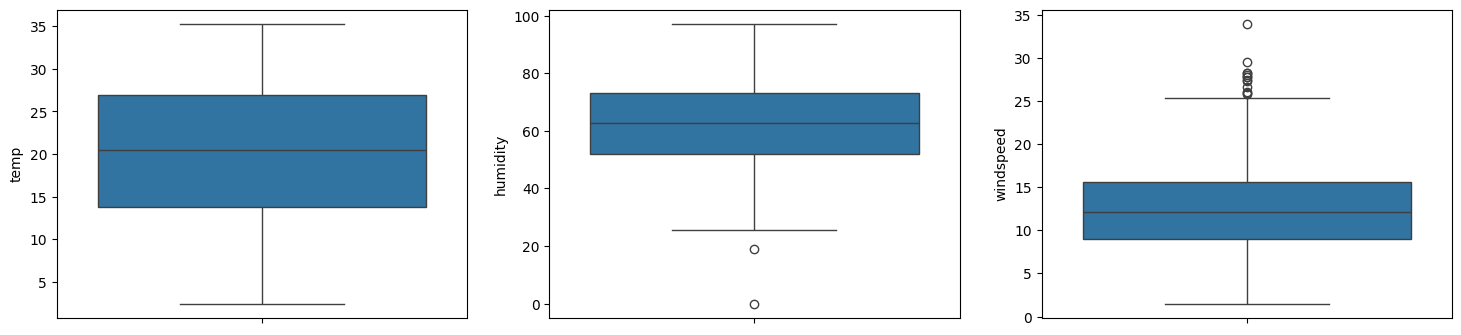

In [806]:
#Box plots for indepent variables with numerical continuous values
columns= ['temp','humidity','windspeed']
plt.figure(figsize=(18,4))

i=1
for col in columns:
    plt.subplot(1,3,i)
    sns.boxplot(y=col, data= byke)
    i+=1

In [807]:
# Listing columns into categorical , numerical  and others
categorical_col= ['season','year','month','holiday','weekday','workingday','weathersit']
numarical_col= ['temp','humidity','windspeed','cnt']
other_col= ['days_old']

<Figure size 1500x2800 with 0 Axes>

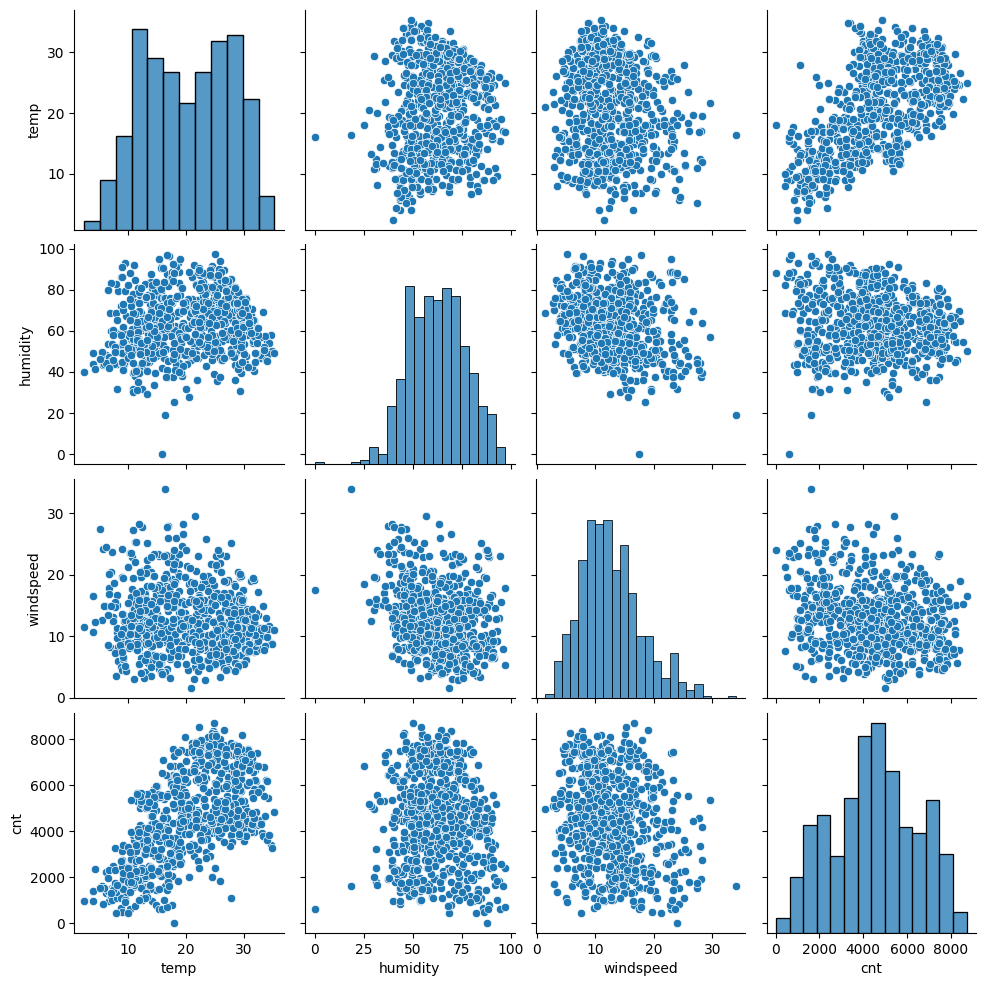

In [808]:
# Pair plot of numerical columns 
plt.figure(figsize=(15,28))
sns.pairplot(data=byke,vars= numarical_col)
plt.show()

In [809]:
byke.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,misty,14.110847,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,misty,14.902598,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,clear,8.050924,43.7273,16.636703,1349
3,spring,0,jan,0,tues,1,clear,8.200000,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,clear,9.305237,43.6957,12.522300,1600


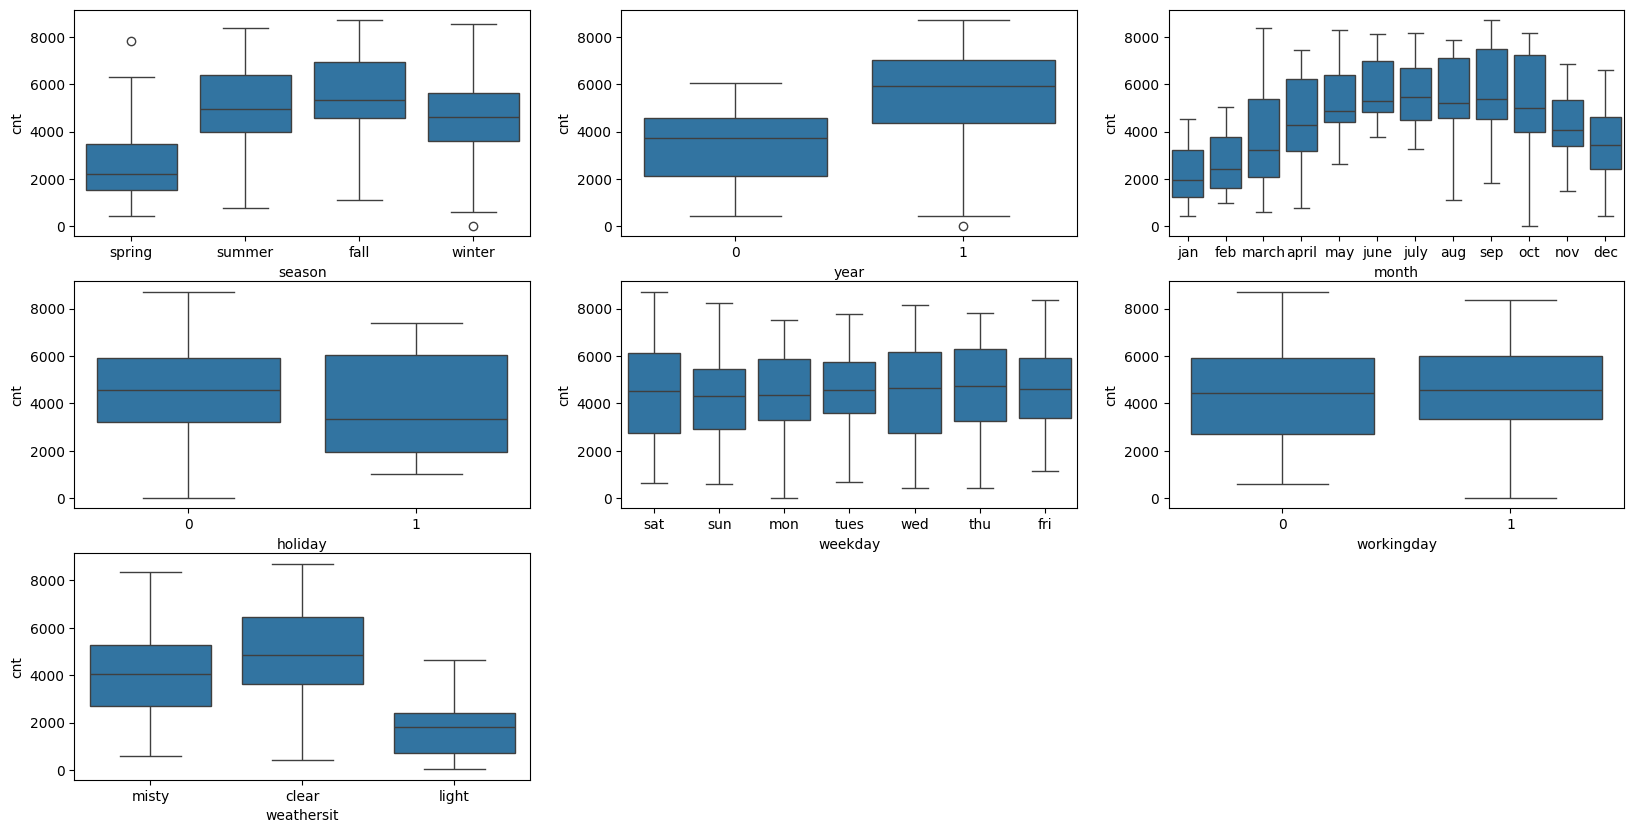

In [810]:
# Pair plot of dependent variable and categorical independent variable 
plt.figure(figsize=(20,10))

i=1
for cat in categorical_col:
    plt.subplot(3,3,i)
    sns.boxplot(data= byke, x= cat ,y='cnt')
    i+=1

High demand of bikes are their in season 3 fall.

Their will be an increase in the demand in 2019(next year)

Demand of bikes are growing till june and the highest demand is in the month of september. After September demand is decreasing.

Weekday is not giving clear picture about demand.

On holidays, demand has decreased.

Clear weathershit has highest demand.

In [811]:
byke.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,misty,14.110847,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,misty,14.902598,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,clear,8.050924,43.7273,16.636703,1349
3,spring,0,jan,0,tues,1,clear,8.200000,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,clear,9.305237,43.6957,12.522300,1600


In [812]:
byke.weathersit.value_counts()

weathersit
clear    463
misty    246
light     21
Name: count, dtype: int64

In [813]:
#Creating dummy variables for all  the categorical variables
byke = pd.get_dummies(data=byke,columns=["season","month","weekday",'weathersit'],drop_first=True,dtype=int)

In [814]:
byke.head()

,year,holiday,workingday,temp,humidity,windspeed,cnt,season_spring,season_summer,season_winter,...,month_oct,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tues,weekday_wed,weathersit_light,weathersit_misty
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [815]:
byke.shape

(730, 29)

In [816]:
byke.columns

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'cnt',
       'season_spring', 'season_summer', 'season_winter', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_july', 'month_june',
       'month_march', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tues', 'weekday_wed', 'weathersit_light', 'weathersit_misty'],
      dtype='object')

In [817]:
#Train Test split with 70:30 ratio
df_train, df_test= train_test_split(byke, train_size=0.7,random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 29)
(220, 29)


In [818]:
numarical_col

['temp', 'humidity', 'windspeed', 'cnt']

In [819]:
#MinMax scaling to normalize scaler to scale
scaler = MinMaxScaler()

df_train[numarical_col]= scaler.fit_transform(df_train[numarical_col])
df_train.head()

,year,holiday,workingday,temp,humidity,windspeed,cnt,season_spring,season_summer,season_winter,...,month_oct,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tues,weekday_wed,weathersit_light,weathersit_misty
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,0.345824,0.751824,0.380981,0.191095,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [820]:
#Distributing train data into dependent and independent variable 
y_train= df_train.pop('cnt')
x_train= df_train

In [821]:
# Build a Lienar Regression model using SKLearn for RFE
#Cut down number of features to 15 using automated approach
lm= LinearRegression()
lm.fit(x_train,y_train)
rfe = RFE(estimator=lm, n_features_to_select=15)
rfe= rfe.fit(x_train,y_train)

In [822]:
#Columns selected by RFE and their weights
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('month_aug', False, 7),
 ('month_dec', False, 4),
 ('month_feb', False, 5),
 ('month_jan', False, 2),
 ('month_july', True, 1),
 ('month_june', False, 13),
 ('month_march', False, 14),
 ('month_may', False, 6),
 ('month_nov', False, 3),
 ('month_oct', False, 10),
 ('month_sep', True, 1),
 ('weekday_mon', False, 8),
 ('weekday_sat', True, 1),
 ('weekday_sun', True, 1),
 ('weekday_thu', False, 11),
 ('weekday_tues', False, 9),
 ('weekday_wed', False, 12),
 ('weathersit_light', True, 1),
 ('weathersit_misty', True, 1)]

In [823]:
#Columns selected by RFE
col = x_train.columns[rfe.support_]
col

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'month_july',
       'month_sep', 'weekday_sat', 'weekday_sun', 'weathersit_light',
       'weathersit_misty'],
      dtype='object')

In [824]:
# Columns not selected by RFE
x_train.columns[~rfe.support_]

Index(['month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_june',
       'month_march', 'month_may', 'month_nov', 'month_oct', 'weekday_mon',
       'weekday_thu', 'weekday_tues', 'weekday_wed'],
      dtype='object')

Model 1

In [825]:
x_train_rfe= x_train[col]

In [826]:
#Adding constraint to train data
x_train_rfe= sm.add_constant(x_train_rfe)

In [827]:
#Performing OLS estimation 
lm= sm.OLS(y_train,x_train_rfe).fit()

In [828]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          2.11e-191
Time:                        22:13:00   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1995      0.028  

In [829]:
#Calculating VIF of variables
vif= pd.DataFrame()
vif['Features']= x_train_rfe.columns
vif['VIF']= [variance_inflation_factor(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
vif['VIF']= round(vif['VIF'], 2)
vif = vif.sort_values(by= 'VIF', ascending= False)
vif

,Features,VIF
2,holiday,inf
3,workingday,inf
12,weekday_sat,inf
13,weekday_sun,inf
7,season_spring,5.02
4,temp,3.62
9,season_winter,3.49
8,season_summer,2.62
5,humidity,1.91
15,weathersit_misty,1.57


Model 2

In [830]:
x_train_new= x_train[col]

In [831]:
#Doping column 
x_train_new= x_train_new.drop(['holiday'], axis=1)

In [832]:
#Adding constraint to train data
x_train_lm= sm.add_constant(x_train_new)

In [833]:
#Performing OLS estimation 
lm=sm.OLS(y_train,x_train_lm).fit()

In [834]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          2.11e-191
Time:                        22:13:01   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1811      0.042  

In [835]:
#Calculating VIF of variables
vif= pd.DataFrame()
vif['Features']= x_train_new.columns
vif['VIF']= [variance_inflation_factor(x_train_new.values, i) for i in range(x_train_new.shape[1])]
vif['VIF']= round(vif['VIF'], 2)
vif = vif.sort_values(by= 'VIF', ascending= False)
vif

,Features,VIF
3,humidity,32.10
2,temp,18.99
1,workingday,18.41
4,windspeed,4.91
10,weekday_sat,4.91
5,season_spring,4.80
11,weekday_sun,4.76
7,season_winter,3.69
6,season_summer,3.04
13,weathersit_misty,2.31


Model 3

In [836]:
#Doping column 
x_train_new= x_train_new.drop(['humidity'], axis=1)

In [837]:
#Adding constraint to train data
x_train_lm= sm.add_constant(x_train_new)

In [838]:
#Performing OLS estimation 
lm=sm.OLS(y_train,x_train_lm).fit()

In [839]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.2
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          1.28e-188
Time:                        22:13:03   Log-Likelihood:                 508.20
No. Observations:                 510   AIC:                            -988.4
Df Residuals:                     496   BIC:                            -929.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1008      0.038  

In [840]:
#Calculating VIF of variables
vif= pd.DataFrame()
vif['Features']= x_train_new.columns
vif['VIF']= [variance_inflation_factor(x_train_new.values, i) for i in range(x_train_new.shape[1])]
vif['VIF']= round(vif['VIF'], 2)
vif = vif.sort_values(by= 'VIF', ascending= False)
vif

,Features,VIF
1,workingday,16.19
2,temp,12.74
3,windspeed,4.76
9,weekday_sat,4.45
10,weekday_sun,4.21
4,season_spring,3.82
6,season_winter,2.78
5,season_summer,2.76
0,year,2.07
7,month_july,1.60


Model 4

In [841]:
#Doping column 
x_train_new= x_train_new.drop(['workingday'], axis=1)

In [842]:
#Adding constraint to train data
x_train_lm= sm.add_constant(x_train_new)

In [843]:
#Performing OLS estimation 
lm=sm.OLS(y_train,x_train_lm).fit()

In [844]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.4
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          2.06e-186
Time:                        22:13:04   Log-Likelihood:                 500.18
No. Observations:                 510   AIC:                            -974.4
Df Residuals:                     497   BIC:                            -919.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2003      0.030  

In [845]:
#Calculating VIF of variables
vif= pd.DataFrame()
vif['Features']= x_train_new.columns
vif['VIF']= [variance_inflation_factor(x_train_new.values, i) for i in range(x_train_new.shape[1])]
vif['VIF']= round(vif['VIF'], 2)
vif = vif.sort_values(by= 'VIF', ascending= False)
vif

,Features,VIF
1,temp,5.18
2,windspeed,4.62
4,season_summer,2.24
3,season_spring,2.11
0,year,2.07
5,season_winter,1.82
6,month_july,1.59
11,weathersit_misty,1.55
7,month_sep,1.33
8,weekday_sat,1.22


Model 5

In [846]:
#Doping column 
x_train_new= x_train_new.drop(['weekday_sat'], axis=1)

In [847]:
#Adding constraint to train data
x_train_lm= sm.add_constant(x_train_new)

In [848]:
#Performing OLS estimation 
lm=sm.OLS(y_train,x_train_lm).fit()

In [849]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.0
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          3.37e-187
Time:                        22:13:05   Log-Likelihood:                 499.22
No. Observations:                 510   AIC:                            -974.4
Df Residuals:                     498   BIC:                            -923.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2034      0.030  

In [850]:
#Calculating VIF of variables
vif= pd.DataFrame()
vif['Features']= x_train_new.columns
vif['VIF']= [variance_inflation_factor(x_train_new.values, i) for i in range(x_train_new.shape[1])]
vif['VIF']= round(vif['VIF'], 2)
vif = vif.sort_values(by= 'VIF', ascending= False)
vif

,Features,VIF
1,temp,5.14
2,windspeed,4.60
4,season_summer,2.23
3,season_spring,2.09
0,year,2.07
5,season_winter,1.80
6,month_july,1.59
10,weathersit_misty,1.55
7,month_sep,1.33
8,weekday_sun,1.17


Model 6

In [851]:
#Doping column 
x_train_new= x_train_new.drop(['month_july'], axis=1)

In [852]:
#Adding constraint to train data
x_train_lm= sm.add_constant(x_train_new)

In [853]:
#Performing OLS estimation 
lm=sm.OLS(y_train,x_train_lm).fit()

In [854]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     249.5
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          5.70e-187
Time:                        22:13:07   Log-Likelihood:                 495.81
No. Observations:                 510   AIC:                            -969.6
Df Residuals:                     499   BIC:                            -923.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1956      0.030  

In [855]:
#Calculating VIF of variables
vif= pd.DataFrame()
vif['Features']= x_train_new.columns
vif['VIF']= [variance_inflation_factor(x_train_new.values, i) for i in range(x_train_new.shape[1])]
vif['VIF']= round(vif['VIF'], 2)
vif = vif.sort_values(by= 'VIF', ascending= False)
vif

,Features,VIF
2,windspeed,4.59
1,temp,3.90
0,year,2.07
3,season_spring,2.00
4,season_summer,1.91
5,season_winter,1.64
9,weathersit_misty,1.55
6,month_sep,1.22
7,weekday_sun,1.17
8,weathersit_light,1.08


In [856]:
y_train_cnt= lm.predict(x_train_lm)

In [857]:
# R squared value between train and predicted train data sets.  
r2=r2_score(y_train,y_train_cnt)
r2

0.8333418171181378

In [858]:
# Adjusted R squared value between train and predicted train data sets. 
n = x_train.shape[0]
k = x_train.shape[1]

# Calculate Adjusted R-squared
adjusted_r_squared = 1 - ((1 - r2) * (n - 1)) / (n - k - 1)

# Round the adjusted R-squared value to 4 decimal places
adjusted_r_squared_rounded = round(adjusted_r_squared, 4)
adjusted_r_squared_percent= (adjusted_r_squared_rounded)*100
adjusted_r_squared_percent

82.36

Text(0.5, 0, 'Errors')

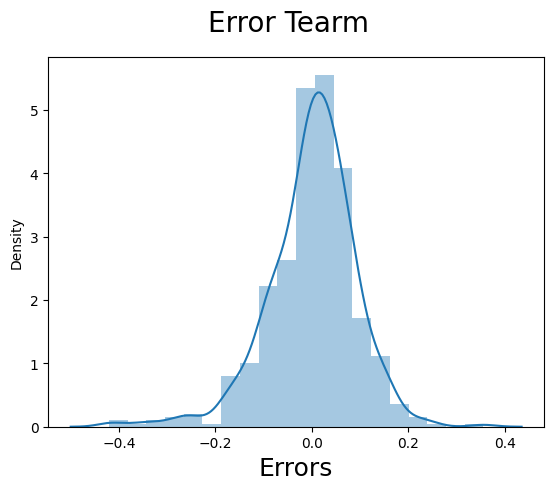

In [859]:
#Normal distribution curve
fig= plt.figure()
sns.distplot((y_train - y_train_cnt),bins= 20)
fig.suptitle('Error Tearm',fontsize=20)
plt.xlabel('Errors', fontsize=18)

Making Predictions

In [860]:
#Test data to be transformed only, no fitting
df_test[numarical_col]= scaler.transform(df_test[numarical_col])

In [861]:
y_test= df_test.pop('cnt')
x_test= df_test

In [862]:
x_test_new= x_test[x_train_new.columns]


x_test_new= sm.add_constant(x_test_new)

In [863]:
#Predict the values for test data
y_pred= lm.predict(x_test_new)

R-Squared value for test predictions

In [864]:
# R squared value between test and predicted test data sets.
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.8032

In [865]:
round(lm.params,4)

const               0.1956
year                0.2344
temp                0.4795
windspeed          -0.1498
season_spring      -0.0572
season_summer       0.0623
season_winter       0.0937
month_sep           0.0854
weekday_sun        -0.0461
weathersit_light   -0.2856
weathersit_misty   -0.0790
dtype: float64

We can see that the equation of our best fitted line is:

cnt= 0.1956+ 0.2344 * year + 0.4795 * temp -0.1498 * windspeed -0.0572 * season_spring + 0.0623 * season_summer + 0.0937 season_winter +  0.0854 * month_sep -0.0461 * weekday_sun -0.2856 * weathersit_light -0.0790 * weathersit_misty  

In [866]:
# Adjusted R squared value between test and predicted test data sets. 
n = x_test.shape[0]
k = x_test.shape[1]

# Calculate Adjusted R-squared
adjusted_r_squared = 1 - ((1 - r2) * (n - 1)) / (n - k - 1)

# Round the adjusted R-squared value to 4 decimal places
adjusted_r_squared_rounded = round(adjusted_r_squared, 4)
adjusted_r_squared_percent= (adjusted_r_squared_rounded)*100
adjusted_r_squared_percent

77.42999999999999

Text(0, 0.5, 'y_pred')

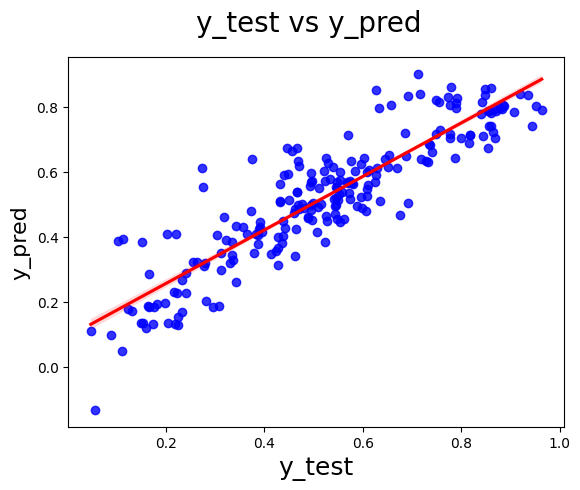

In [869]:
fig= plt.figure()
sns.regplot(x=y_test,y=y_pred,ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
fig.suptitle('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test',fontsize=18)
plt.ylabel('y_pred',fontsize=16)